In [1]:
import os
%pwd

'D:\\Generative AI\\Project\\Medical_Assistant\\GENERATIVE_AI_MEDICAL_ASSISTANT\\notebook'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
os.chdir("D:\\Generative AI\\Project\\Medical_Assistant\\GENERATIVE_AI_MEDICAL_ASSISTANT\\notebook")

In [9]:
%pwd

'D:\\Generative AI\\Project\\Medical_Assistant\\GENERATIVE_AI_MEDICAL_ASSISTANT\\notebook'

In [12]:
identity_train = pd.read_csv("Data_Store/train_identity.csv")
identity_test = pd.read_csv("Data_Store/test_identity.csv")
transaction_train = pd.read_csv("Data_Store/train_transaction.csv")
transaction_test = pd.read_csv("Data_Store/test_transaction.csv")

In this project we are trying to predict whether an online transaction is fraudulent or not. The IEEE Fraud detection dataset is broken down into two files 'identity' and 'transaction' data which are joined by the transactionId. It can also be seen that the data is unbalanced because only 3.5% of the transactions are fraudulent.

In [13]:
train_set = transaction_train.merge(identity_train, how = 'left',left_index = True,right_index=True )
test_set = transaction_test.merge(identity_test, how = 'left',left_index = True,right_index=True )

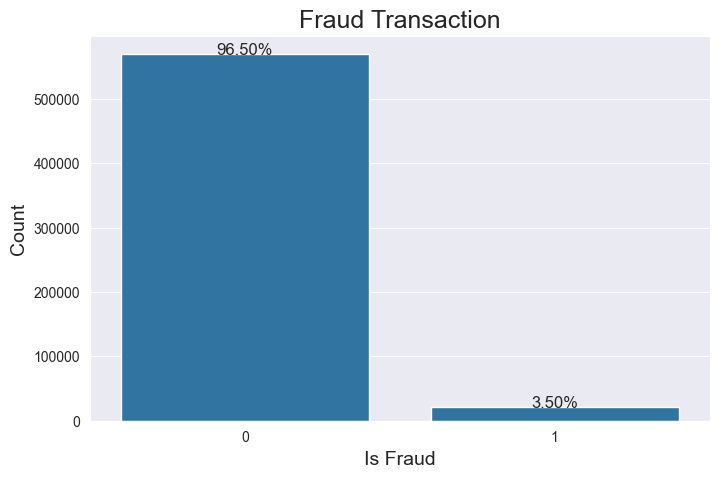

In [14]:
import seaborn as sns
fig, ax  = plt.subplots(figsize=(8, 5))
sns.countplot(x='isFraud', data=train_set, ax=ax)
ax.set_title('Fraud Transaction', fontsize=18)
ax.set_xlabel('Is Fraud', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            f'{height/train_set.shape[0] * 100:.2f}%',
            ha='center', fontsize=12)

The TransactionDT feature is a timedelta from a given reference datetime (and not the actual timestamp).The transaction date of the test set is bigger than that of the train set. It implies that the test set is latter in time than the train set and there is no overlap between the two, there is around a one-moth gap in between training and test set.The timespan of the dataset is around 1-year.

In [15]:
print("Mininum date of training set:",min(train_set['TransactionDT']))
print("Maximum date of training set:",max(train_set['TransactionDT']))
print("Minimum date of test set:",min(test_set['TransactionDT']))
print("Maximum date of test set:",max(test_set['TransactionDT']))
print("Timespan of dataset in years:",(max(test_set['TransactionDT'])-min(train_set['TransactionDT']))/(3600*24*365))

Mininum date of training set: 86400
Maximum date of training set: 15811131
Minimum date of test set: 18403224
Maximum date of test set: 34214345
Timespan of dataset in years: 1.0821900367833588


C:\Users\DELL\AppData\Local\Temp\ipykernel_17012\2651739263.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_set['TransactionDT'], kde=False, ax=ax, label='train')
C:\Users\DELL\AppData\Local\Temp\ipykernel_17012\2651739263.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_set['T

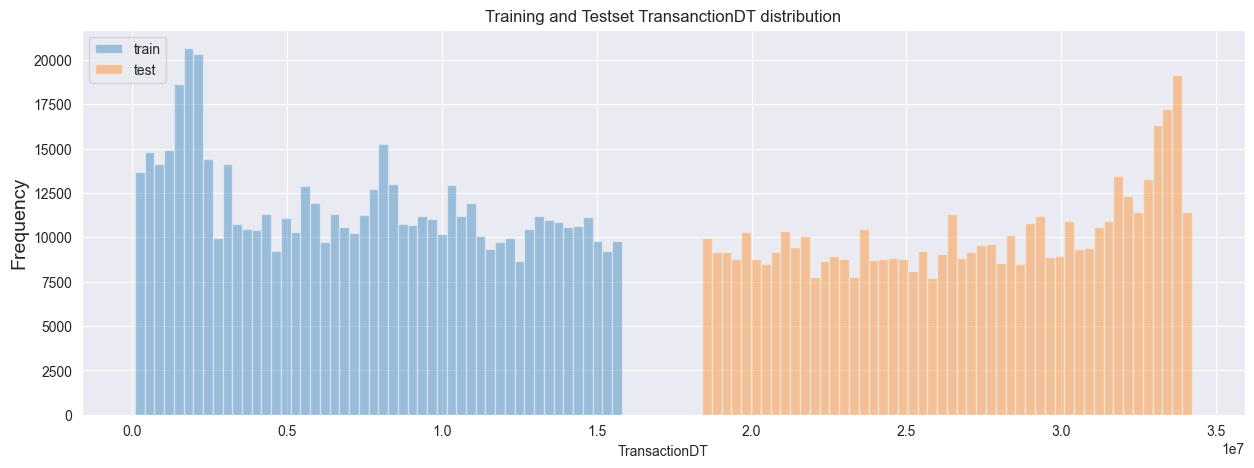

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(train_set['TransactionDT'], kde=False, ax=ax, label='train')
sns.distplot(test_set['TransactionDT'], kde=False, ax=ax, label='test')
ax.set_title('Training and Testset TransanctionDT distribution')
ax.set_ylabel('Frequency', fontsize=14)
ax.legend()

The transaction amount is in USD. From the below plots, it can be seen that the fraudulent transaction amount is generally lower than the non-fraudulent transaction amounts.

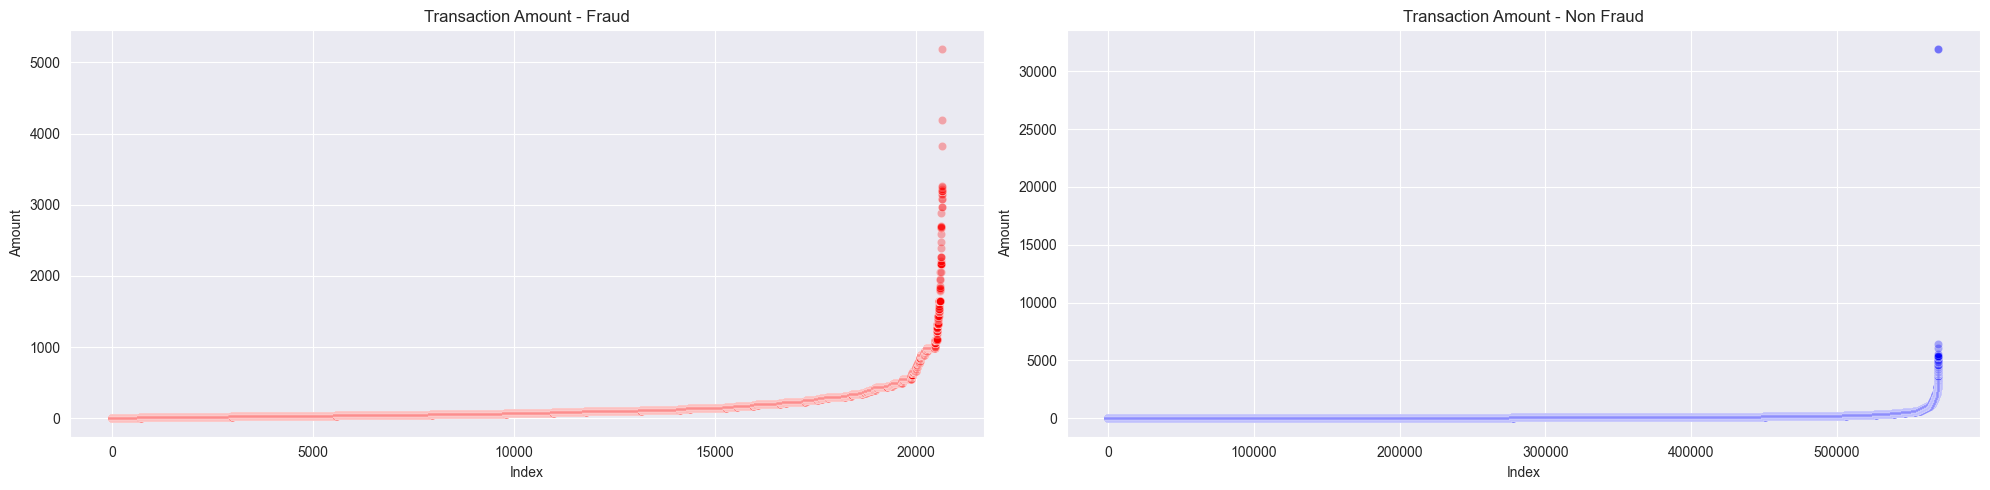

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

fraud_amt = train_set[train_set['isFraud'] == 1]['TransactionAmt'].values
non_fraud_amt = train_set[train_set['isFraud'] == 0]['TransactionAmt'].values

# Plot for fraudulent transactions
sns.scatterplot(
    x=range(train_set[train_set['isFraud'] == 1].shape[0]),
    y=np.sort(fraud_amt),
    alpha=0.3,
    color='red',
    ax=ax[0]
)
ax[0].set_title("Transaction Amount - Fraud")
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Amount")

# Plot for non-fraudulent transactions
sns.scatterplot(
    x=range(train_set[train_set['isFraud'] == 0].shape[0]),
    y=np.sort(non_fraud_amt),
    alpha=0.3,
    color='blue',  # optional: add color to differentiate
    ax=ax[1]
)
ax[1].set_title("Transaction Amount - Non Fraud")
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Amount")

fig.tight_layout()
plt.show()


If we consider the product code for all the transactions, it can be seen that maximum transactions are for product code 'W'. The highest number of frauds are products with code 'C' followed by S and then H

Text(0, 0.5, 'Percentage')

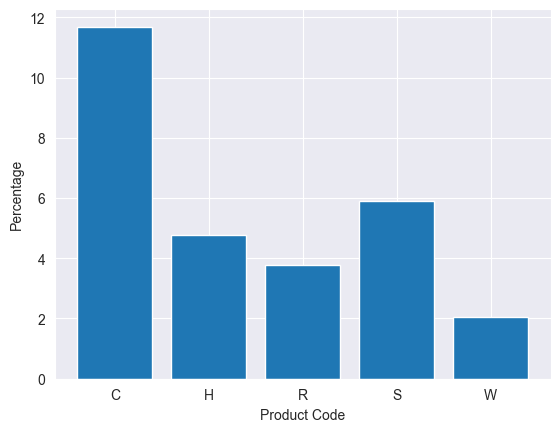

In [19]:
product_grouped = train_set.groupby('ProductCD')['isFraud'].value_counts(normalize=True)
product_grouped = product_grouped.mul(100).rename('Percent').reset_index()
fraud_products = product_grouped[product_grouped['isFraud']==1]
plt.bar(fraud_products['ProductCD'], fraud_products['Percent'])
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel("Product Code")
plt.ylabel("Percentage")

From the dataset, the card 4 column mentions the category the card belongs to. 97.2% of the data belongs to either mastercard or visa. It can also be seen that out of all the card types, the discover card type has the maximum number of frauds followed by mastercard and visa.

Text(0, 0.5, 'Percentage')

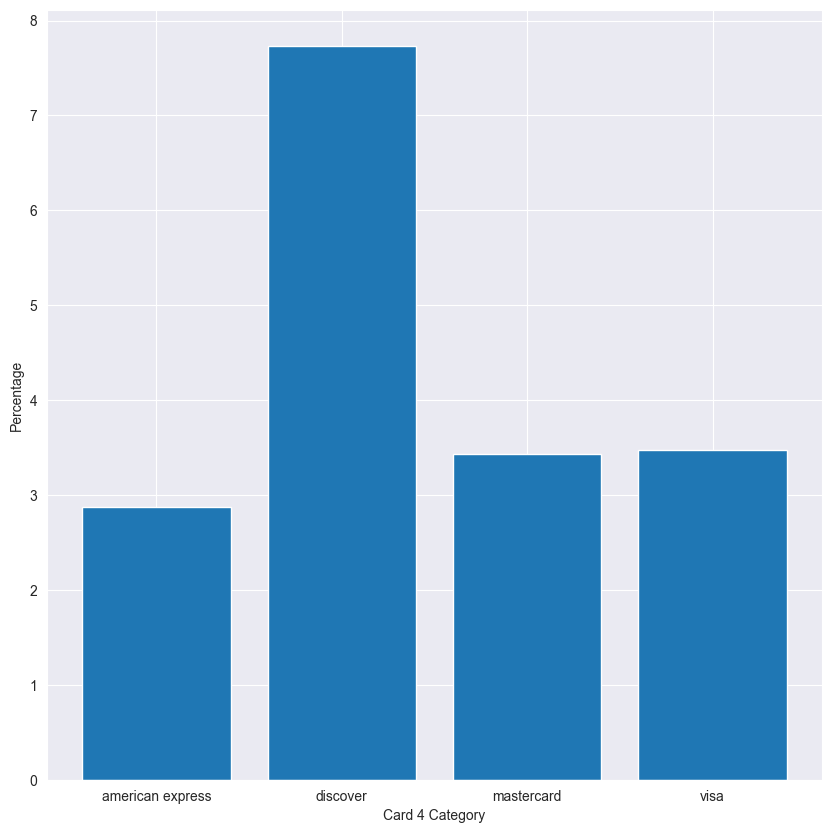

In [20]:
card_grouped = train_set.groupby('card4')['isFraud'].value_counts(normalize=True)
card_grouped = card_grouped.mul(100).rename('Percent').reset_index()
fraud_cards = card_grouped[card_grouped['isFraud']==1]
plt.bar(fraud_cards['card4'], fraud_cards['Percent'])
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel("Card 4 Category")
plt.ylabel("Percentage")

For the Address values in the dataset 'addr1' and 'addr2' , for addr1 around 83% of the data is in the highest 35 unique values. The rest of the unique values can be grouped into one category called others. Similarly, for addr2, around 88% of data in addr2 is cluster in 5 unique values. Values with less than 80 entries will be grouped into category "Others". It can be seen that the maximum number of frauds occur in low frequency groups than higher frequency groups.

In [21]:
print((train_set['addr1'].value_counts().head(35) / train_set['addr1'].shape[0] * 100).sum())
print((train_set['addr2'].value_counts().head(35) / train_set['addr2'].shape[0] * 100).sum())

82.91208046872354
88.86104243573679


In [30]:
# Convert addr1 and addr2 to string type
train_set['addr1'] = train_set['addr1'].astype(str)
train_set['addr2'] = train_set['addr2'].astype(str)

# Replace infrequent addr1 values (<= 5000 occurrences) with "Others"
train_set.loc[
    train_set['addr1'].isin(train_set['addr1'].value_counts()[train_set['addr1'].value_counts() <= 5000].index),
    'addr1'
] = "Others"

# Replace infrequent addr2 values (<= 50 occurrences) with "Others"
train_set.loc[
    train_set['addr2'].isin(train_set['addr2'].value_counts()[train_set['addr2'].value_counts() <= 50].index),
    'addr2'
] = "Others"


Text(0, 0.5, 'Percentage Fraud')

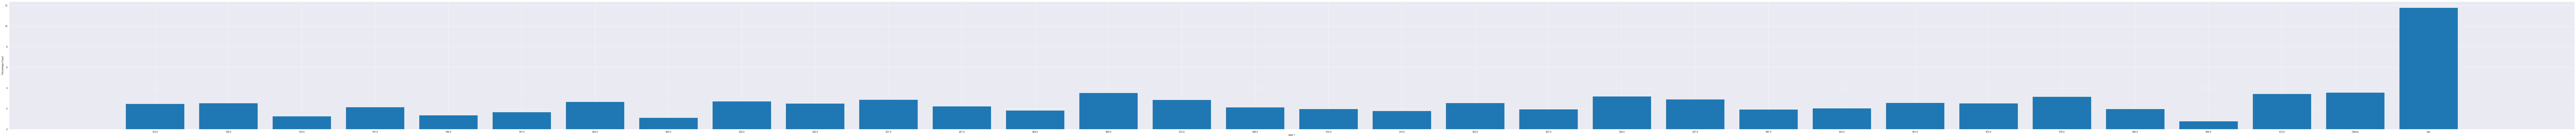

In [31]:
addr1_grouped = train_set.groupby('addr1')['isFraud'].value_counts(normalize=True)
addr1_grouped = addr1_grouped.mul(100).rename('Percent').reset_index()
fraud_addr1 = addr1_grouped[addr1_grouped['isFraud']==1]
fraud_addr1 = fraud_addr1.astype({"addr1": 'str'})
plt.bar(fraud_addr1['addr1'], fraud_addr1['Percent'])
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel("Addr 1")
plt.ylabel("Percentage Fraud")

In [32]:
def ploting_cnt_amt(df, col, lim=2000):
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    total = len(df)

    plt.figure(figsize=(16,14))
    plt.suptitle(f'{col} Distributions ', fontsize=24)

    plt.subplot(211)
    g = sns.countplot( x=col,  data=df, order=list(tmp[col].values))
    gt = g.twinx()
    gt = sns.pointplot(x=col, y='Fraud', data=tmp, order=list(tmp[col].values),
                       color='black', legend=False, )
    gt.set_ylim(0,tmp['Fraud'].max()*1.1)
    gt.set_ylabel("%Fraud Transactions", fontsize=16)
    g.set_title(f"Most Frequent {col} values and % Fraud Transactions", fontsize=20)
    g.set_xlabel(f"{col} Category Names", fontsize=16)
    g.set_ylabel("Count", fontsize=17)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    sizes = []
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=12)

    g.set_ylim(0,max(sizes)*1.15)
    plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_17012\1213340032.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),rotation=45)


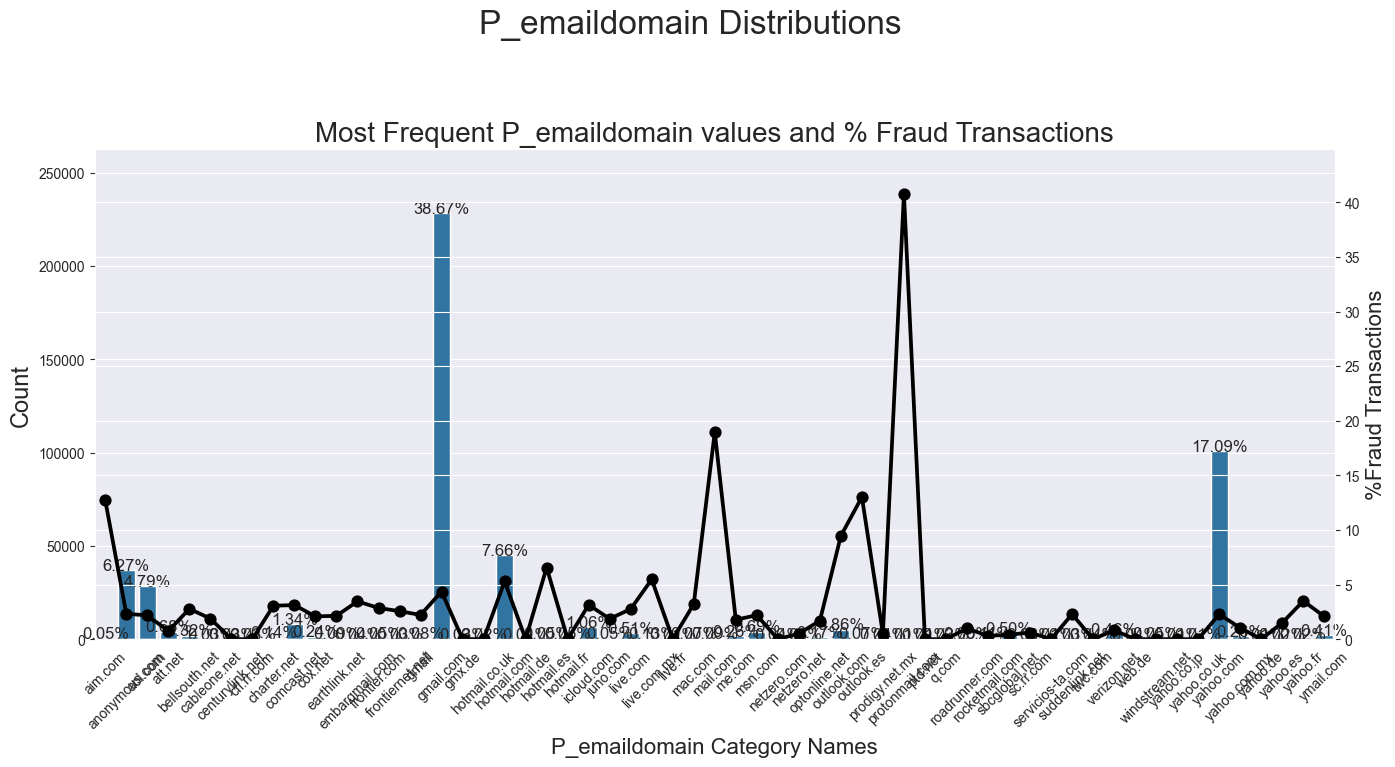

In [33]:
ploting_cnt_amt(train_set, 'P_emaildomain')

Text(0, 0.5, 'Percentage Fraud')

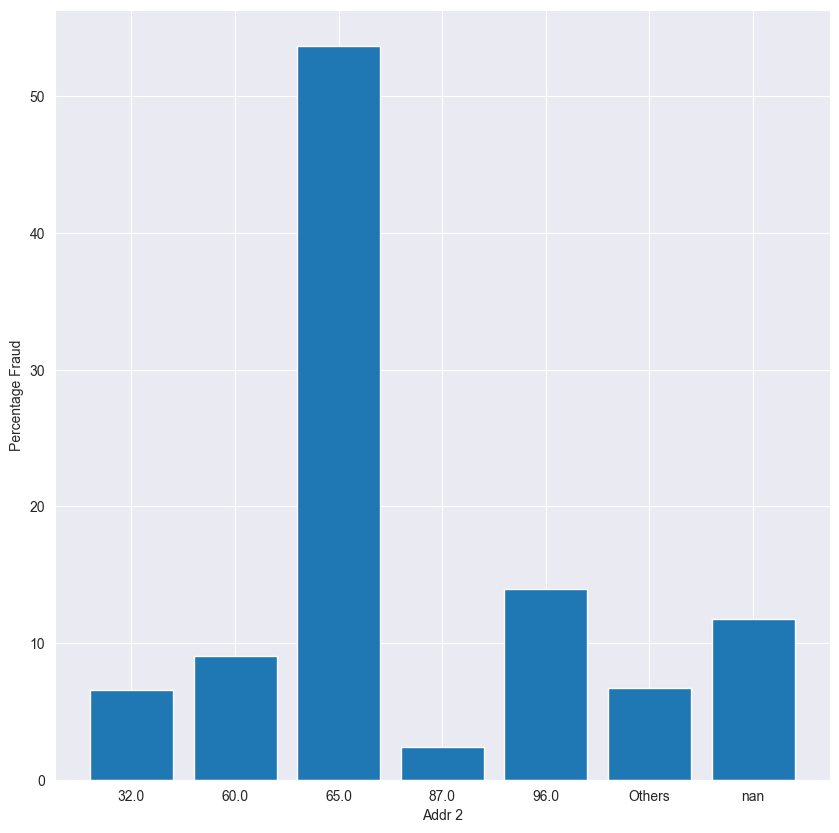

In [34]:
addr2_grouped = train_set.groupby('addr2')['isFraud'].value_counts(normalize=True)
addr2_grouped = addr2_grouped.mul(100).rename('Percent').reset_index()
fraud_addr2 = addr2_grouped[addr2_grouped['isFraud']==1]
fraud_addr2 = fraud_addr2.astype({"addr2": 'str'})
plt.bar(fraud_addr2['addr2'], fraud_addr2['Percent'])
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel("Addr 2")
plt.ylabel("Percentage Fraud")

Text(0, 0.5, 'Percentage Fraud')

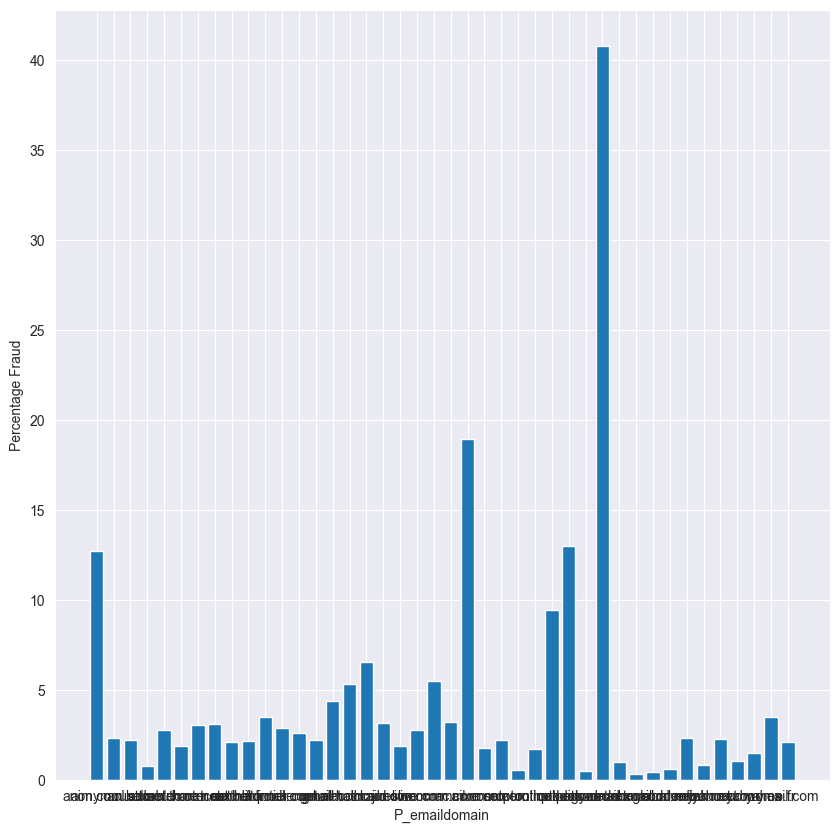

In [35]:
pemail_grouped = train_set.groupby('P_emaildomain')['isFraud'].value_counts(normalize=True)
pemail_grouped = pemail_grouped.mul(100).rename('Percent').reset_index()
fraud_pemail = pemail_grouped[pemail_grouped['isFraud']==1]
plt.bar(fraud_pemail['P_emaildomain'], fraud_pemail['Percent'])
plt.rcParams["figure.figsize"] = (200,10)
plt.xlabel("P_emaildomain")
plt.ylabel("Percentage Fraud")

Text(0, 0.5, 'Percentage Fraud')

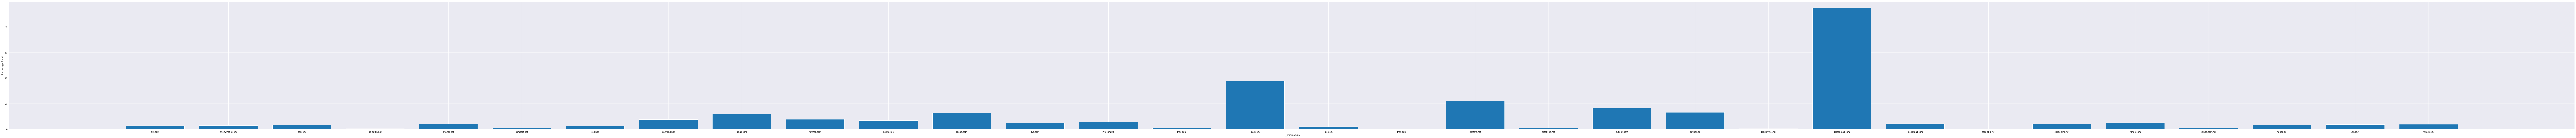

In [36]:
remail_grouped = train_set.groupby('R_emaildomain')['isFraud'].value_counts(normalize=True)
remail_grouped = remail_grouped.mul(100).rename('Percent').reset_index()
fraud_remail = remail_grouped[remail_grouped['isFraud']==1]
plt.bar(fraud_remail['R_emaildomain'], fraud_remail['Percent'])
plt.rcParams["figure.figsize"] = (200,10)
plt.xlabel("R_emaildomain")
plt.ylabel("Percentage Fraud")

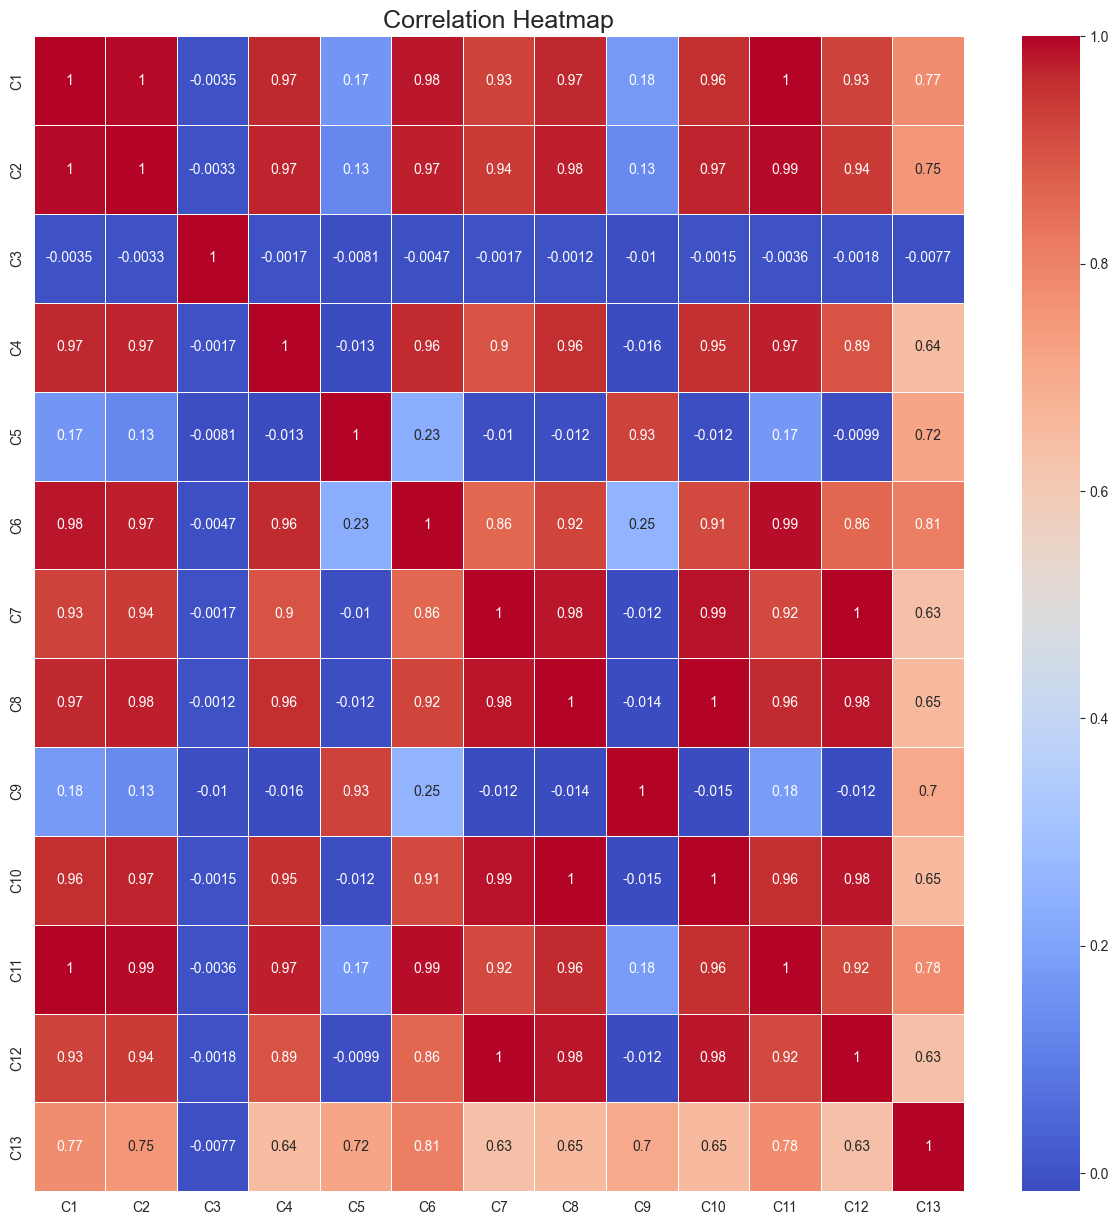

In [38]:
corr = train_set.iloc[:, 16:30]
corr_numeric = corr.select_dtypes(include='number')
corr_matrix = corr_numeric.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, linewidths=.5, annot=True, ax=ax, cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

# FEATURE ENGINEERING

In [39]:
import os
import gc

import numpy as np
import pandas as pd

from tqdm import tqdm

from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [42]:
X_train = pd.read_csv("Data_Store/train_transaction.csv")
train_id = pd.read_csv("Data_Store/train_identity.csv")

In [43]:
train_tr_len = X_train.shape[0]
train_id_len = train_id.shape[0]


In [44]:
tr_cols = X_train.columns
id_cols = train_id.columns

In [45]:
print("Shape of train transactions =", X_train.shape)
print("Shape of train identity =", train_id.shape)

Shape of train transactions = (590540, 394)
Shape of train identity = (144233, 41)


In [46]:
X_train = X_train.merge(train_id, how='left', on='TransactionID')

In [47]:
X_test = pd.read_csv("Data_Store/test_transaction.csv")
test_id = pd.read_csv("Data_store/test_identity.csv")

In [48]:
test_tr_len = X_test.shape[0]
test_id_len = test_id.shape[0]

print("Shape of train transactions =", X_test.shape)
print("Shape of train identity =", test_id.shape)

Shape of train transactions = (506691, 393)
Shape of train identity = (141907, 41)


In [49]:
fix = {o:n for o, n in zip(test_id.columns, train_id.columns)}
test_id.rename(columns=fix, inplace=True)

X_test = X_test.merge(test_id, how='left', on='TransactionID')

# TARGET

y_train = X_train['isFraud'].copy()
del train_id, test_id, X_train['isFraud']; x = gc.collect()

In [50]:
X_train.shape, X_test.shape, y_train.shape

((590540, 433), (506691, 433), (590540,))

In [51]:
set(X_train.columns) == set(X_test.columns)

True

Drop columns based on number of null values


In [52]:
id_ratio = 1 - train_id_len/train_tr_len
id_ratio

0.7557608290716971

Approximately 76% of the training set doesn't have identity information, so we cannot drop ID columns which have less than equal to 76% nulls

In [53]:
X_train_nulls = X_train.isnull().sum()/X_train.shape[0]
max(X_train_nulls)

0.9919615944728554

In [54]:
id_cols

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [55]:
drop_id_cols = [col for col in id_cols if X_train_nulls.loc[col] >= 0.9]
drop_tr_cols = [col for col in tr_cols if col != 'isFraud' and X_train_nulls.loc[col] >= 0.9]

drop_null_cols = drop_id_cols + drop_tr_cols

In [56]:
X_train.drop(drop_null_cols, axis=1, inplace=True)
X_test.drop(drop_null_cols, axis=1, inplace=True)

In [57]:
X_train.shape, X_test.shape


((590540, 421), (506691, 421))

Drop Correlated Columns


In [58]:
def make_corr(df, cols, title=''):

    cols = ['TransactionDT'] + cols

    plt.figure(figsize=(15,15))
    sns.heatmap(df[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)

    if title != '':
        plt.title(title, fontsize=14)
    else:
        plt.title(cols[0]+' - '+cols[-1],fontsize=14)
    plt.show()

In [59]:
def detect_corr_groups(df, col_subset, threshold=0.9):
    cor = df[col_subset].corr()
    cor.loc[:,:] =  np.tril(cor, k=-1)
    cor = cor.stack()
    return list(cor[cor > threshold].keys())

In [60]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""

    master_list = []
    for i in range(0, len(lst), n):
        master_list.append(lst[i:i + n])

    return master_list

In [61]:
v_cols = [col for col in X_train if col.startswith('V')]
v_cols = chunks(v_cols, 20)

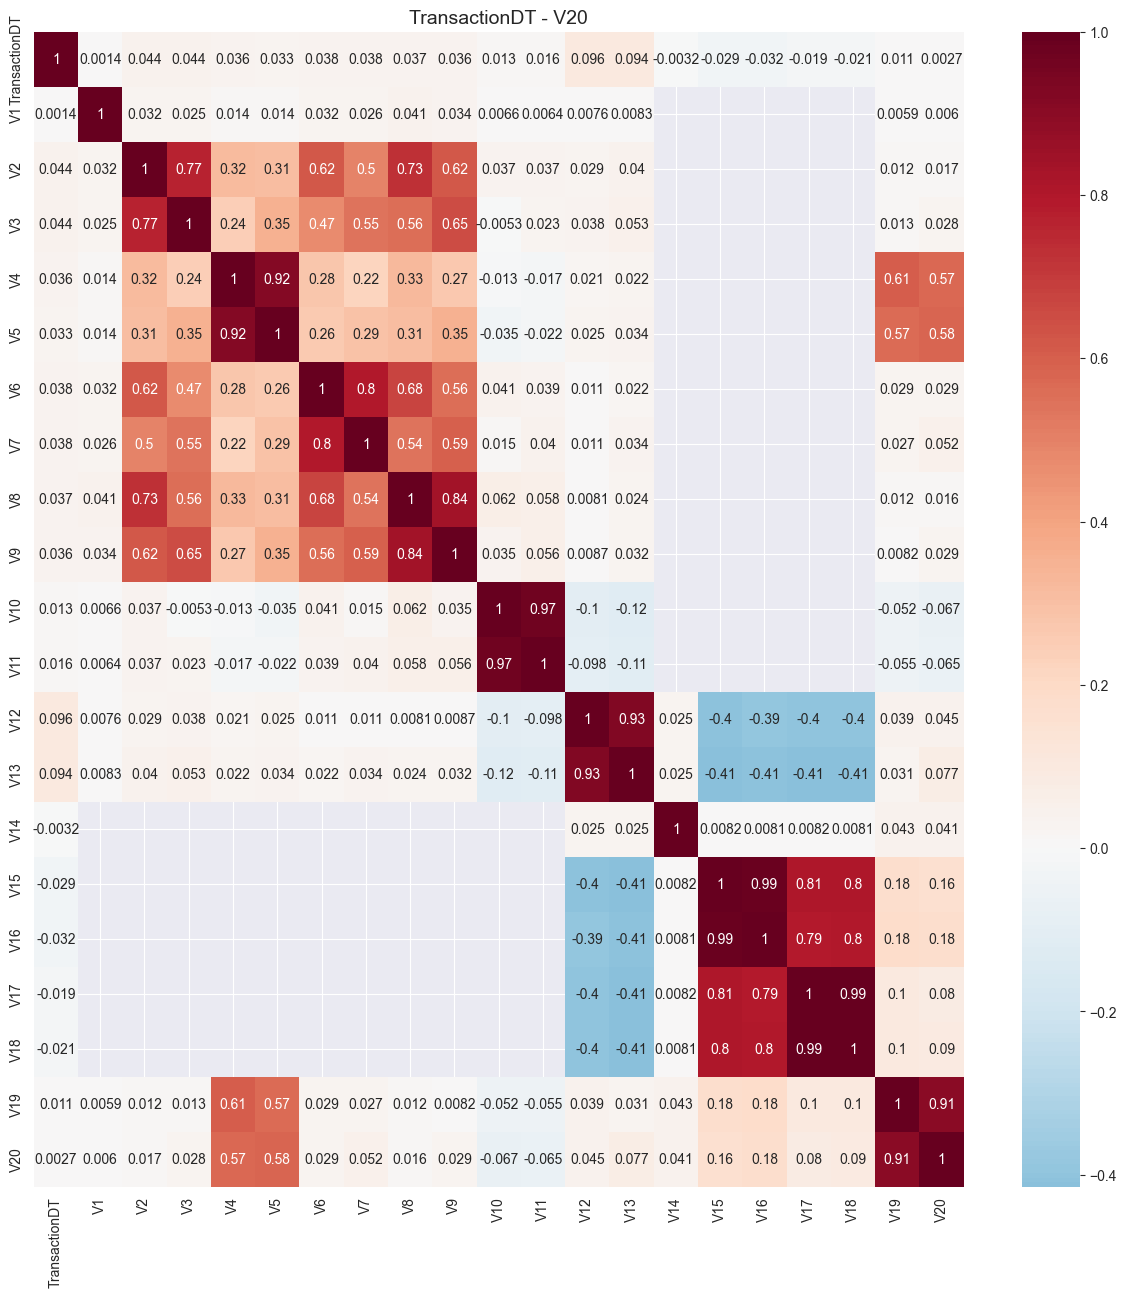

In [62]:
make_corr(X_train, v_cols[0])

In [63]:
def reduce_corr_tuple(df, col1, col2):
    remove_col = None

    if df[col1].nunique() > df[col2].nunique():
        remove_col = col1
    else:
        remove_col = col2

    return remove_col

In [64]:
remove_sets = set()

for i in tqdm(range(len(v_cols))):
    remove_set = set()

    corr_pairs = detect_corr_groups(X_train, v_cols[i])

    for pair in corr_pairs:
        if pair[0] in remove_set or pair[1] in remove_set:
            continue
        else:
            remove_col = reduce_corr_tuple(X_train, pair[0], pair[1])
            remove_set.add(remove_col)

    remove_sets = remove_sets.union(remove_set)

100%|██████████| 17/17 [01:11<00:00,  4.21s/it]


In [65]:
X_train.drop(list(remove_sets), axis=1, inplace=True)
X_test.drop(list(remove_sets), axis=1, inplace=True)

In [66]:
X_train.shape, X_test.shape


((590540, 303), (506691, 303))

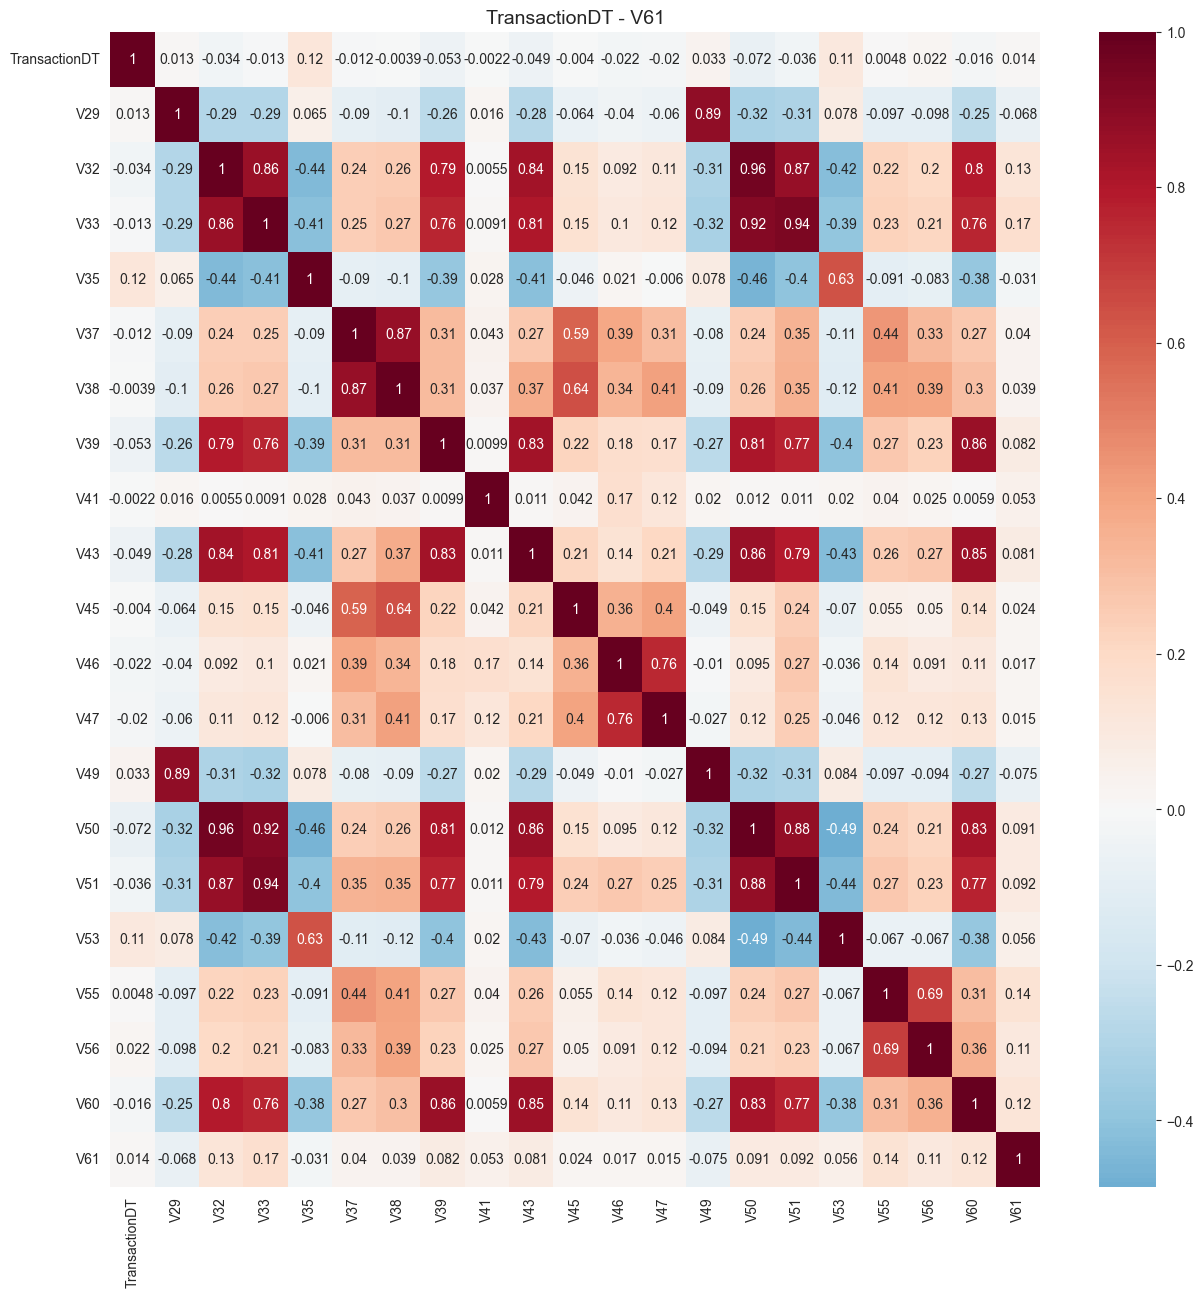

In [67]:
test_cols = chunks([col for col in X_train.columns if col.startswith('V')], 20)[1]

make_corr(X_train, test_cols)

We can see that there are still columns which are correlated with each other. This is problematic and we should make one more pass to remove any other correlated columns.

In [68]:
v_cols = [col for col in X_train.columns if col.startswith('V')]

remove_set = set()

corr_pairs = detect_corr_groups(X_train, v_cols)

for i in range(len(corr_pairs)):
    pair = corr_pairs[i]
    if pair[0] in remove_set or pair[1] in remove_set:
        continue
    else:
        remove_col = reduce_corr_tuple(X_train, pair[0], pair[1])
        remove_set.add(remove_col)

In [69]:
X_train.drop(list(remove_set), axis=1, inplace=True)
X_test.drop(list(remove_set), axis=1, inplace=True)

In [70]:
X_train.shape, X_test.shape

((590540, 243), (506691, 243))

# Encode Categorical Variables
One-hot encode: ProductCD, card4,card6, M4, id_12, id_15, id_34

Freq encode: P_emaildomain, R_emaildomain, id_30, id_31, id_33, DeviceInfo

Binary encode: M1, M2, M3, M5, M6, M7, M8, M9, id_16, id_28, id_29, id_35, id_36, id_37, id_38, deviceType

In [71]:
one_hot_cols = ['ProductCD', 'card4', 'card6', 'M4', 'id_12', 'id_15', 'id_34']
binary_cols = ['M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_16', 'id_28',
               'id_29', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType']
freq_cols = ['P_emaildomain', 'R_emaildomain', 'id_30', 'id_31', 'id_33', 'DeviceInfo']

In [72]:
set(X_train.columns) == set(X_test.columns)


True

In [73]:
for col in binary_cols:
    assert set(X_train[col]) == set(X_test[col])

## Binary Encoding


In [74]:
for col in binary_cols:
    mapping = dict(zip([val for val in X_train[col].unique() if not pd.isnull(val)],[0, 1]))
    X_train[col] = X_train[col].replace(mapping).astype(float)
    X_test[col] = X_test[col].replace(mapping).astype(float)

C:\Users\DELL\AppData\Local\Temp\ipykernel_17012\1145245706.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train[col] = X_train[col].replace(mapping).astype(float)
C:\Users\DELL\AppData\Local\Temp\ipykernel_17012\1145245706.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test[col] = X_test[col].replace(mapping).astype(float)
C:\Users\DELL\AppData\Local\Temp\ipykernel_17012\1145245706.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior

In [75]:
X_train.shape, X_test.shape


((590540, 243), (506691, 243))

In [77]:
import pandas as pd

# Original DataFrame
df = pd.DataFrame({'x': ['a', 'b', 'a', 'b']})

# Create dummies for column 'x'
dummies = pd.get_dummies(df['x'], prefix='x')

# Concatenate dummies back to the original DataFrame
df = pd.concat([df, dummies], axis=1)

print(df)


   x    x_a    x_b
0  a   True  False
1  b  False   True
2  a   True  False
3  b  False   True


In [78]:
for col in one_hot_cols:
    X_train[col + '_one_hot'] = X_train[col].copy()
    X_test[col + '_one_hot'] = X_test[col].copy()

X_train = pd.get_dummies(X_train, columns=one_hot_cols)
X_test = pd.get_dummies(X_test, columns=one_hot_cols)

X_train.shape, X_test.shape

((590540, 268), (506691, 265))

In [79]:
missing_cols = set(X_train.columns) - set(X_test.columns)

for col in missing_cols:
    X_test[col] = 0

In [80]:
X_train.rename({col + '_one_hot': col for col in one_hot_cols}, axis=1, inplace=True)
X_test.rename({col + '_one_hot': col for col in one_hot_cols}, axis=1, inplace=True)

In [81]:
X_train.shape, X_test.shape


((590540, 268), (506691, 268))

In [82]:
class FreqEncoder:

    def __init__(self, col):
        self.col = col
        self.total_rows = 0
        self.value_map = {}

    def freq_map(self):
        return {k: v/self.total_rows for k, v in self.value_map.items()}

    def predict_values(self, row):
        if pd.isnull(row[self.col]):
            return row[self.col]

        return self.value_map.get(row[self.col], 0)/self.total_rows

    def encode(self, row):
        self.total_rows += 1

        if pd.isnull(row[self.col]):
            return row[self.col]

        value = row[self.col]

        curr_freq = self.value_map.get(value, 0)
        curr_rows = self.total_rows - 1 if self.total_rows != 1 else 1

        self.value_map[value] = curr_freq + 1

        return curr_freq/curr_rows

In [83]:
for i in tqdm(range(len(freq_cols))):
    col = freq_cols[i]

    fe = FreqEncoder(col)
    X_train[col + '_fe'] = X_train.apply(fe.encode, axis=1)
    X_test[col + '_fe'] = X_test.apply(fe.predict_values, axis=1)

100%|██████████| 6/6 [03:28<00:00, 34.79s/it]


In [84]:
class TimeBasedExpandingAggregation:

    def _init_(self, col1, col2):
        self.col1 = col1
        self.col2 = col2
        self.agg_map = {}
        self.value_map = {}

    def freq_map(self):
        return {k: v/self.agg_map.get(row[self.col2], 1) for k, v in self.value_map.items()}

    def predict_values(self, row):

        if pd.isnull(row[self.col1]):
            return row[self.col1]

        if pd.isnull(row[self.col2]):
            return row[self.col2]

        agg = row[self.col1]
        value = row[self.col2]
        return self.value_map.get((value,agg), 0)/self.agg_map.get(agg, 1)

    def encode(self, row):

        if pd.isnull(row[self.col1]):
            return row[self.col1]

        if pd.isnull(row[self.col2]):
            return row[self.col2]

        agg = row[self.col1]
        value = row[self.col2]

        curr_freq = self.value_map.get((value,agg), 0)
        curr_rows = self.agg_map.get(agg, 0)

        self.value_map[(value, agg)] = curr_freq + 1
        self.agg_map[agg] = curr_rows + 1

        if curr_rows == 0:
            return curr_freq

        return curr_freq/curr_rows

In [85]:
id_columns = ['addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'card4', 'card6']


In [86]:
X_train['isFraud'] = y_train


In [87]:
X_train.shape, X_test.shape


((590540, 275), (506691, 274))

In [88]:
X_train.to_csv("train_set_without_id_features.csv")
X_test.to_csv("test_set_without_id_features.csv")

In [89]:
X_train = pd.read_csv("train_set_without_id_features.csv")
X_test = pd.read_csv("test_set_without_id_features.csv")

In [90]:
X_train.shape, X_test.shape

((590540, 276), (506691, 275))

In [91]:
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))


id_combinations = [list(l) for l in list(powerset(id_columns)) if 1 <= len(l) <= 4]

In [93]:
class TimeBasedExpandingAggregation:
    def __init__(self, feature_col, target_col):
        self.feature_col = feature_col
        self.target_col = target_col
        self.history = {}

    def encode(self, row):
        key = row[self.feature_col]
        if key in self.history and self.history[key]:
            return sum(self.history[key]) / len(self.history[key])
        else:
            return 0  # or np.nan

    def predict_values(self, row):
        key = row[self.feature_col]
        if key in self.history and self.history[key]:
            return sum(self.history[key]) / len(self.history[key])
        else:
            return 0  # or np.nan

    def update_history(self, row):
        key = row[self.feature_col]
        val = row[self.target_col]
        if key not in self.history:
            self.history[key] = []
        self.history[key].append(val)


In [94]:
from tqdm import tqdm

agg_cols = ['P_emaildomain', 'R_emaildomain', 'card4', 'card6']

for col in tqdm(agg_cols):
    fa = TimeBasedExpandingAggregation(col, "isFraud")

    # For training set: simulate time-wise processing
    encoded_train = []
    for _, row in X_train.iterrows():
        encoded_value = fa.encode(row)
        encoded_train.append(encoded_value)
        fa.update_history(row)  # update after encode

    X_train[col + '_fa'] = encoded_train

    X_test[col + '_fa'] = X_test.apply(fa.predict_values, axis=1)



100%|██████████| 4/4 [2:09:11<00:00, 1937.96s/it]


In [95]:
X_train.to_csv("train_set_without_id_features_with_agg.csv")
X_test.to_csv("test_set_without_id_features_with_agg.csv")

# Fraud Detection (Model)

In [97]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/5c/98/d145af334fd5807d6ba1ead447bf0c57a36654ea58e726d70c0d09cae913/tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/98/5e/34ccb5bfb8dae555045c2dd13375e01ac8e2c1f200a4e4051e95fb9addf0/absl_py-2.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/b8/25/155f9f080d5e4bc0082edfda032ea2bc2b8fab3f4d25d46c1e9dd22a1a89/flatbuffers-25.2.10-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/a3/61/8001b38461d751c


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [131]:
import numpy as np
import pandas as pd
import os
import warnings

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, precision_score

In [132]:
X = pd.read_csv("train_set_without_id_features_with_agg.csv")
X.shape

(590540, 281)

Select columns to remove



In [133]:
remove_cols = list(X.dtypes[X.dtypes == "object"].keys()) + ['Unnamed: 0', 'TransactionID', 'TransactionDT']


Sort values by time



In [134]:
X.sort_values(by=['TransactionDT'], inplace=True)


In [135]:
y = X['isFraud'].copy()
y = y.to_frame()
X.drop('isFraud', axis=1)
X = X.fillna(-999)

In [136]:
splitpoint = int(0.8 * X.shape[0])

X_train, X_test, y_train, y_test = X[0:splitpoint], X[splitpoint:X.shape[0]], y[0:splitpoint], y[splitpoint:y.shape[0]]

In [137]:
X_train['TransactionDT'].max(), X_test['TransactionDT'].min()


(12192842, 12192900)

In [138]:
del X, y


In [139]:
X_train.drop(remove_cols, axis=1, inplace=True)
X_test.drop(remove_cols, axis=1, inplace=True)

X_train.shape, X_test.shape

((472432, 265), (118108, 265))

In [140]:
X_test = X_test[X_train.columns]


X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Training

In [141]:
from keras.models import Sequential
from keras.layers import Input, Dense

def build_model(input_dim):
    model = Sequential()
    model.add(Input(shape=input_dim))  # ✅ This is the recommended way
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [142]:
model = build_model((X_train.shape[1],))


In [143]:
print(X_train)  # Shows the data type of all elements
print(X_train.shape)  # Shows the shape of the array


[[0 68.5 13926 ... 0.0 0.0 0.0]
 [1 29.0 2755 ... 0.0 0.0 0.0]
 [2 59.0 4663 ... 0.0 0.0 0.0]
 ...
 [472429 40.0 16659 ... 0.115164203091628 0.0347245885785311
  0.0672806743677802]
 [472430 15.0 7919 ... 0.021142108636883 0.0349063044789574
  0.0239708211135312]
 [472431 49.0 13749 ... 0.0211420497141949 0.0347244758875835
  0.0672801215955305]]
(472432, 265)


In [144]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

In [162]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [163]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights (as np.ndarray, not list)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1]),
    y=y_train.reshape(-1)
)

# Create dict for use in model.fit
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

# Fit the model with class weights
model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=512,
    verbose=1,
    validation_split=0.2,
    callbacks=[early_stopping],
    class_weight=class_weights_dict
)


Epoch 1/20
739/739 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8883 - loss: 0.6834 - val_accuracy: 0.0393 - val_loss: 0.7073
Epoch 2/20
739/739 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6995 - loss: 0.6837 - val_accuracy: 0.9608 - val_loss: 0.6659
Epoch 3/20
739/739 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8173 - loss: 0.6803 - val_accuracy: 0.9608 - val_loss: 0.6822
Epoch 4/20
739/739 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7449 - loss: 0.6850 - val_accuracy: 0.9608 - val_loss: 0.6792
Epoch 5/20
739/739 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8779 - loss: 0.6852 - val_accuracy: 0.0393 - val_loss: 0.7045


In [164]:
X_test = X_test.astype(np.float32)



In [165]:
test_y = model.predict(X_test)

cutoff = 0.2
preds = (test_y > cutoff).astype(int)


3691/3691 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


In [166]:

print('F1 score:',f1_score(y_test.reshape(-1), preds))
print('Precision score:', precision_score(y_test.reshape(-1), preds))
print('Area Under the Receiver Operating Characteristic Curve:',roc_auc_score(y_test, test_y))

F1 score: 0.0665297001743458
Precision score: 0.03440947615297992
Area Under the Receiver Operating Characteristic Curve: 0.5000043842727369


In [ ]:
pd.Series(preds).value_counts()


In [1]:
pd.Series(y_test.reshape(-1)).value_counts()

NameError: name 'pd' is not defined

In [ ]:
import gc
import os
import warnings
import numpy as np
import pandas as pd

import xgboost as xgb

from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, precision_score

import h2o
from h2o.automl import H2OAutoML

h2o.init()

In [ ]:
X = pd.read_csv("train_set_without_id_features.csv")


In [ ]:
X.drop(list(X.dtypes[X.dtypes == "object"].keys()), axis=1, inplace=True)
X.drop('Unnamed: 0', axis=1, inplace=True)
X.sort_values(by=['TransactionDT'], inplace=True)
X.drop(['TransactionID','TransactionDT'], axis=1, inplace=True)